Note: All code in script is sourced from various internet sources, from mentor Tomasz Popiel and from Alan Chalk at Sabre Insurance.

## K-Medoids


 - Start_: import modules, set directories, load data ('03_distancematrix_20%_exclude_target.hkl') 
 
- Determine number of clusters 
  - Silhouette Coefficient 
- K-Medoids
  - NPASS 
- Variable 'tq_v3' investigation 
- Target variables analysis
- t-SNE visualisation 



### Start


Import modules

In [0]:
import os
import hickle as hkl
import gc

import pandas as pd
import numpy as np

from scipy.spatial.distance import squareform

import numpy as np 
from Bio.Cluster import kmedoids
from sklearn import metrics 

from Bio.Cluster import kmedoids 

import collections, numpy 

import seaborn
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE

import seaborn as sns
import matplotlib.pyplot as plt

Set directories

In [0]:
print(os.getcwd())

dirRawData = "../RawData/"
dirPData = "../PData/"
dirPOutput = "../POutput/"

/Users/koonkarnarthasarnprasit/Desktop/Sabre_QMUL_2019_cluster-master/PCode


Load data

In [0]:
fname = dirPData + '03_distancematrix_20%_exclude_target.hkl' 
with open(fname, 'r') as f:
    dict_ = hkl.load(f)


# %% Load data

D_3 = dict_['D_3']
df_all_2 = dict_['df_all_2'] # 20% of non scaled data 
df_all = dict_['df_all'] # 20% of scaled data

del fname

### K-Medoids

#### Determining the number of clusters

In [0]:
D_3_square = squareform(D_3)
del D_3
gc.collect()

73

In [0]:
print(D_3_square.shape)

(13039, 13039)


Silhouette Coefficient

Starting with wide search 

In [0]:
clusters = 2 + 5 * np.arange(40) 
means = []

for i in clusters:

    clusterid, error, found = kmedoids(D_3_square, nclusters=i, npass=10, initialid=None)
    
    
    mean = metrics.silhouette_score(D_3_square, clusterid, metric='precomputed')
    print(i, "cluster", mean)

2 cluster 0.22399877482621114
7 cluster 0.13319524879244007
12 cluster 0.11345555930920861
17 cluster 0.10828427091752195
22 cluster 0.10653489284207042
27 cluster 0.09207138600404263
32 cluster 0.10299341483774976
37 cluster 0.07897355098981532
42 cluster 0.08894543294630583
47 cluster 0.07517464393052209
52 cluster 0.08258249238864504
57 cluster 0.07485705906866237
62 cluster 0.06606238211377459
67 cluster 0.07732233136545294
72 cluster 0.0639814760503246
77 cluster 0.06993411925166415
82 cluster 0.06493454314135501
87 cluster 0.052619969069347176
92 cluster 0.07710416972655423
97 cluster 0.05803749743420769
102 cluster 0.05242806697705165
107 cluster 0.05431514629457332
112 cluster 0.04256383270867629
117 cluster 0.05127580608979673
122 cluster 0.049962436587769846
127 cluster 0.058415953157803666
132 cluster 0.054003664658461806
137 cluster 0.0482911291604544
142 cluster 0.052119075965952694
147 cluster 0.05719409501895467
152 cluster 0.04189026917298489
157 cluster 0.0544160631554

As cluster size increase, the score is lower. So a more focus number is computed.

In [0]:
for i in [2,3,4,5,6,7,8,9,10]:

    clusterid, error, found = kmedoids(D_3_square, nclusters=i, npass=10, initialid=None)
    
    
    mean = metrics.silhouette_score(D_3_square, clusterid, metric='precomputed')
    print(i, "cluster", mean)

2 cluster 0.22399877482621114
3 cluster 0.20011354320561223
4 cluster 0.17327202807866113
5 cluster 0.16279431684399331
6 cluster 0.14136539792056324
7 cluster 0.13451135259101876
8 cluster 0.13349736659258715
9 cluster 0.14428605959352023
10 cluster 0.1213793132058401


4 clusters provide the highest silhouette score.

#### Building the K-Medoids model

NPASS

In [0]:
for i in [5,10,20,30,40,50,90,100,200]:
    
    clusterid, error, found = kmedoids(D_3_square, nclusters=4, npass=i, initialid=None) # choosing 4 clusters
    
    print(i, "iteration", error, found)

5 iteration 111950.1490217519 2
10 iteration 115602.51464952229 1
20 iteration 114716.60297535913 1
30 iteration 114394.82833739113 1
40 iteration 114394.82833739113 1
50 iteration 113531.6963995392 1
90 iteration 111950.1490217519 1
100 iteration 111950.1490217519 2
200 iteration 111950.1490217519 2


5, 90, 100, 200 has the lowest error. However, 5 is too low and above 90 does not have any changes. 

In [0]:
clusterid, error, found = kmedoids(D_3_square, nclusters=4, npass=90, initialid=None) # specify chosen npass here

In [0]:
print(clusterid)

[8208 8208 3366 ... 8208 5637 5637]


In [0]:
len(clusterid)

13039

In [0]:
print(error)

111950.1490217519


In [0]:
# count number of data points in each cluster
# will need this for group report
collections.Counter(clusterid)

Counter({8208: 3689, 3366: 3508, 8947: 2642, 5637: 3200})

## Variable 'tq_v3' investigation 

Make dataframe 'info' of each data entry ID, 'tq_v3', target varaibles, cluster label

In [0]:
clustering_labels = pd.DataFrame(clusterid, columns=['cluster'])

In [0]:
datainfo = pd.DataFrame(df_all_2[['id','tq_v3','tq_dt1_mean','tq_dt2_mean','tq_dt3_mean','tq_dt4_mean','tq_dt1_std','tq_dt2_std','tq_dt3_std','tq_dt4_std']])

using df_all_2 because this is the non-scaled dataset

In [0]:
clustering_labels.reset_index(drop=True, inplace=True)
datainfo.reset_index(drop=True, inplace=True)

In [0]:
info = pd.concat([datainfo,clustering_labels], axis = 1)

In [0]:
info.head()

,id,tq_v3,tq_dt1_mean,tq_dt2_mean,tq_dt3_mean,tq_dt4_mean,tq_dt1_std,tq_dt2_std,tq_dt3_std,tq_dt4_std,cluster
0,12468,16,0.0984,0.0328,0.0,0.0164,0.3514,0.1796,0.0,0.128,8208
1,32442,4,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.000,8208
2,26216,3,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.000,3366
3,50550,1,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0,0.000,8947
4,45726,2,0.1250,0.0000,0.0,0.0000,0.3536,0.0000,0.0,0.000,8208


To get summary statistics of the target variables for each cluster

In [0]:
info[info.cluster == 8208].describe()

,id,tq_v3,tq_dt1_mean,tq_dt2_mean,tq_dt3_mean,tq_dt4_mean,tq_dt1_std,tq_dt2_std,tq_dt3_std,tq_dt4_std,cluster
count,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.000000,3689.0
mean,32995.942261,21.821632,0.100250,0.068821,0.006522,0.010381,0.284257,0.224814,0.040310,0.056311,8208.0
std,18772.475137,26.661576,0.090875,0.076698,0.021460,0.027387,0.177595,0.166274,0.080967,0.087310,0.0
min,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8208.0
25%,17090.000000,4.000000,0.041700,0.000000,0.000000,0.000000,0.204000,0.000000,0.000000,0.000000,8208.0
50%,32945.000000,11.000000,0.090900,0.055600,0.000000,0.000000,0.307800,0.242200,0.000000,0.000000,8208.0
75%,49279.000000,29.000000,0.137900,0.097200,0.004900,0.012400,0.385200,0.329900,0.070200,0.111500,8208.0
max,65268.000000,172.000000,1.000000,1.000000,0.600000,0.666700,1.732100,1.414200,1.341600,0.707100,8208.0


In [0]:
info[info.cluster == 3366].describe()

,id,tq_v3,tq_dt1_mean,tq_dt2_mean,tq_dt3_mean,tq_dt4_mean,tq_dt1_std,tq_dt2_std,tq_dt3_std,tq_dt4_std,cluster
count,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.000000,3508.0
mean,32698.011117,35.457811,0.116650,0.079584,0.008758,0.011047,0.313642,0.252155,0.057335,0.063876,3366.0
std,18622.804693,46.968113,0.097869,0.086119,0.027897,0.031868,0.165018,0.164856,0.088197,0.084657,0.0
min,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3366.0
25%,16753.250000,5.000000,0.062500,0.028600,0.000000,0.000000,0.253250,0.172450,0.000000,0.000000,3366.0
50%,32290.500000,17.000000,0.111100,0.071400,0.000000,0.000000,0.339450,0.273950,0.000000,0.000000,3366.0
75%,48661.750000,47.000000,0.154800,0.105400,0.010700,0.013600,0.405225,0.340875,0.105025,0.117900,3366.0
max,65339.000000,345.000000,2.000000,1.000000,1.000000,1.000000,1.500000,1.788900,1.414200,0.816500,3366.0


## Target variables analysis


Plotting the target variable values for each cluster on box plots (one plot for each of the 8 target variables) to assess the distribution of the target variables in each cluster.

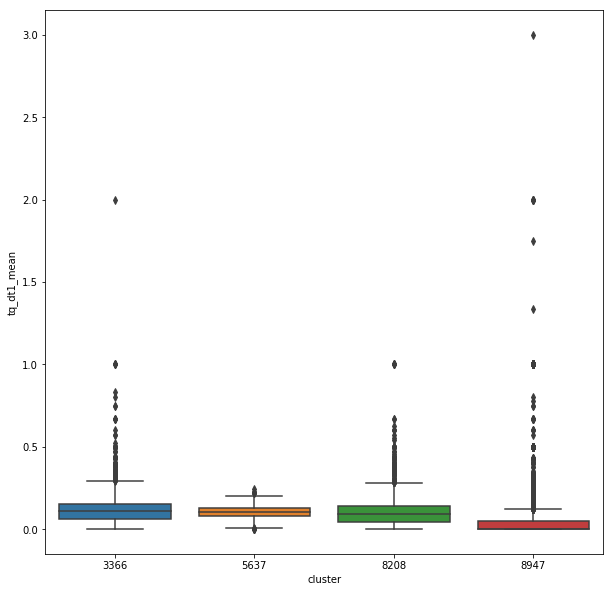

In [0]:
plt.figure(figsize=(10,10))
seaborn.boxplot(x='cluster', y= 'tq_dt1_mean', data = info)

In [0]:
cluster8208 = info[info.cluster == 8208] 
print(cluster8208.shape)
print(cluster8208.id)

(3689, 11)
0        12468
1        32442
4        45726
8        14658
15       27900
17       35319
19       27340
21        3668
24       31847
25       24295
27        7637
29       22958
31       23938
33         470
37       34673
38       45901
40       17957
41       48590
45       64651
52       28511
56       55817
60       36117
61       19151
62       64478
66       31649
71        7283
74       36025
78       40351
82       52641
83       39725
         ...  
12941    12815
12943    56764
12945    53430
12949    15893
12951    21896
12955    44834
12956     9077
12958    50381
12960    16497
12964    12701
12965    22262
12966     8701
12970    59950
12973    20075
12979    48545
12982    47393
12983     8434
12986    23179
12992    62343
12997    12861
12998    36499
13003    15706
13009    35444
13013    14425
13017    14747
13023    51313
13026    58928
13030    39059
13031    25080
13036    35761
Name: id, Length: 3689, dtype: int64


Investigate the tq_v3 value

In [0]:
datainfo2 = pd.DataFrame(df_all[['id', 'tq_v3']])

In [0]:
clustering_labels.reset_index(drop=True, inplace=True)
datainfo2.reset_index(drop=True, inplace=True)

In [0]:
tq_v3_clusters = pd.concat([datainfo2,clustering_labels], axis = 1)

In [0]:
tq_v3_clusters

,id,tq_v3,cluster
0,12468,0.101440,8208
1,32442,0.022524,8208
2,26216,0.018076,3366
3,50550,0.006899,8947
4,45726,0.013147,8208
5,52654,0.005956,8947
6,32587,0.301703,5637
7,65030,0.614943,5637
8,14658,0.041496,8208
9,39706,0.000000,8947


In [0]:
size = tq_v3_clusters['cluster'].value_counts()
size.sort_values()

8947    2642
5637    3200
3366    3508
8208    3689
Name: cluster, dtype: int64

Scaled mean value of tq_v3

In [0]:
tq_v3 =tq_v3_clusters.groupby('cluster')['tq_v3'].mean()
tq_v3.sort_values()

cluster
8947    0.016713
8208    0.110738
3366    0.154678
5637    0.413281
Name: tq_v3, dtype: float64

Non-scaled mean value of tq_v3

In [0]:
tq_v3 =info.groupby('cluster')['tq_v3'].mean()
tq_v3.sort_values()

cluster
8947      2.624905
8208     21.821632
3366     35.457811
5637    548.111562
Name: tq_v3, dtype: float64

## t-SNE Visualisation

Plot the clusters with t-SNE to visualise the clusters 

In [0]:
D_square_TSNE = TSNE(n_components=2, metric = 'precomputed', random_state=123).fit_transform(D_3_square) #use two componenets, so can be plotted in 2D

# Select the 0th feature: xs
x = D_square_TSNE[:,0]
# Select the 1st feature: ys
y = D_square_TSNE[:,1]

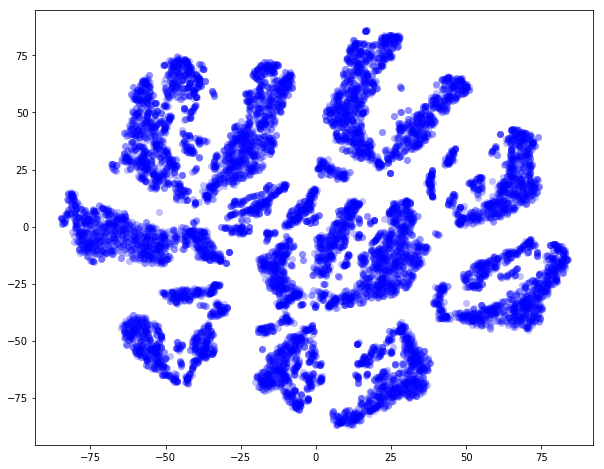

In [0]:
plt.figure(figsize=(10, 8))
plt.scatter(x, y, s=50, linewidth=0, c='b', alpha=0.25)

In [0]:
D_square_TSNE =  pd.DataFrame(D_square_TSNE, columns=['D_square_TSNE_x','D_square_TSNE_y'])

In [0]:
D_square_TSNE = pd.concat([D_square_TSNE,clustering_labels], axis = 1)

In [0]:
D_square_TSNE.head()

,D_square_TSNE_x,D_square_TSNE_y,cluster
0,-21.228294,32.767761,8208
1,3.023602,-11.961539,8208
2,3.882936,29.398232,3366
3,-11.283945,-29.191425,8947
4,4.687564,-17.569279,8208


In [0]:
%matplotlib inline 

#set font size of labels on matplotlib plots
plt.rc('font', size=20)

/Users/koonkarnarthasarnprasit/anaconda3/lib/python3.7/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


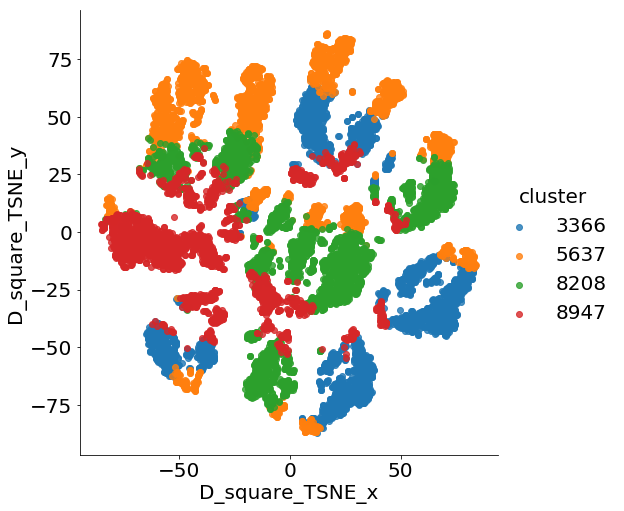

In [0]:
sns.lmplot(data=D_square_TSNE, x='D_square_TSNE_x', y='D_square_TSNE_y', hue='cluster', size =7.5, fit_reg=False, legend=True, legend_out=True
          )  